Assignment 3

In [20]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import salem
import cartopy.crs as ccrs
import pandas as pd
from dask.diagnostics import ProgressBar
import cartopy.feature as cfeature
import fwi_nz as fwi_calc

In [8]:
import xarray as xr
from tethysts import Tethys

In [3]:
DIR=!pwd
ts=Tethys(cache=DIR[0]+"/cache")
datasets = ts.datasets

In [4]:
datasets

[{'feature': 'pedosphere',
  'parameter': 'altitude',
  'method': 'simulation',
  'product_code': 'ALOS World 3D-30m',
  'owner': 'Japan Aerospace Exploration Agency',
  'aggregation_statistic': 'unknown',
  'frequency_interval': 'None',
  'utc_offset': '0H',
  'dataset_id': '980177538186a9bb9c9a0672',
  'units': 'm',
  'license': 'https://creativecommons.org/licenses/by/4.0/',
  'attribution': 'Provided by AW3D (Japan Aerospace Exploration Agency)',
  'result_type': 'grid',
  'extent': {'type': 'Polygon',
   'coordinates': [[[179.1, -48.0],
     [179.1, -33.9],
     [165.9, -33.9],
     [165.9, -48.0],
     [179.1, -48.0]]]},
  'time_range': {'from_date': '2011-01-01T00:00:00',
   'to_date': '2011-01-01T00:00:00'},
  'spatial_resolution': 0.00028,
  'precision': 1.0,
  'product_description': 'The ALOS Global Digital Surface Model (AW3D30) is a global dataset generated from images collected using the Panchromatic Remote-sensing Instrument for Stereo Mapping (PRISM) aboard the Advanced 

In [5]:
station_ID="1dd0e5e15552fce719028dbd"
OWNER="FENZ"          

In [6]:
# Precipitation Data (Precip)
my_dataset = [d for d in datasets if (d['owner'] == OWNER) and (d['parameter'] == 'precipitation')]
dataset_id = my_dataset[0]["dataset_id"]
PRC=  ts.get_results(dataset_id,station_ID)
# Wind Direction Data (WD)
my_dataset = [d for d in datasets if (d['owner'] == OWNER) and (d['parameter'] == 'wind_direction')]
dataset_id = my_dataset[0]["dataset_id"]
WD=  ts.get_results(dataset_id,station_ID)
# Wind Speed Data (WS)
my_dataset = [d for d in datasets if (d['owner'] == OWNER) and (d['parameter'] == 'wind_speed')]
dataset_id = my_dataset[0]["dataset_id"]
WS=  ts.get_results(dataset_id,station_ID)
# Temperature Data (T)
my_dataset = [d for d in datasets if (d['owner'] == OWNER) and (d['parameter'] == 'temperature')]
dataset_id = my_dataset[0]["dataset_id"]
T=  ts.get_results(dataset_id,station_ID)
# Relative Humidity Data (RH)
my_dataset = [d for d in datasets if (d['owner'] == OWNER) and (d['parameter'] == 'relative_humidity')]
dataset_id = my_dataset[0]["dataset_id"]
RH=  ts.get_results(dataset_id,station_ID)

In [9]:
ds = xr.merge([WS, WD, T, RH,PRC],compat='override')

In [10]:
ds.to_netcdf("AWS_Data.nc", mode="w",format='NETCDF4')

1a

In [3]:
EVR_sd = xr.open_dataset('AWS_Data.nc')

In [4]:
EVR_sd

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 218634)
Coordinates:
  * geometry           (geometry) object '01010000007B14AE47E1926540C7681D554...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 1999-08-13T23:00:00 ... 2024-09-...
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (time, geometry, height) float32 ...
    wind_direction     (geometry, height, time) float32 ...
    temperature        (geometry, height, time) float32 ...
    relative_humidity  (geometry, height, time) float32 ...
    precipitation      (time, geometry, height) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

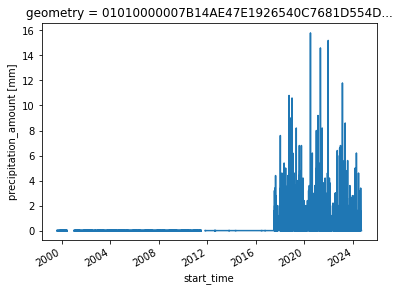

In [5]:
EVR_sd.precipitation.plot()

In [11]:
%%time
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    EVR_sd.temperature,
    EVR_sd.relative_humidity,
    EVR_sd.wind_speed,
    EVR_sd.precipitation,
    start_date="2016-12-13",
    end_date = "2024-09-09",
    ws_unit="m/s"
) # 2 months prior to the Port Hills fire

CPU times: user 51.9 s, sys: 738 ms, total: 52.6 s
Wall time: 52 s


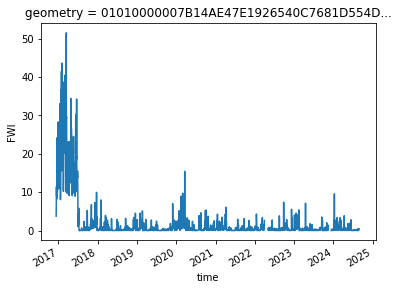

In [12]:
fwi_data.plot() #Plotting the FWI 2 months prior to the port hills fire

In [13]:
%%time
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    EVR_sd.temperature,
    EVR_sd.relative_humidity,
    EVR_sd.wind_speed,
    EVR_sd.precipitation,
    start_date="2017-01-13",
    end_date = "2024-09-09",
    ws_unit="m/s"
) # 1 month prior to the Port Hills fire

CPU times: user 51.8 s, sys: 725 ms, total: 52.5 s
Wall time: 51.9 s


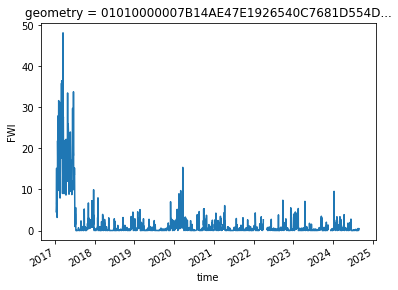

In [14]:
fwi_data.plot() #Plotting the FWI 1 month prior to the port hills fire

In [15]:
%%time
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    EVR_sd.temperature,
    EVR_sd.relative_humidity,
    EVR_sd.wind_speed,
    EVR_sd.precipitation,
    start_date="2017-02-06",
    end_date = "2024-09-09",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

CPU times: user 51.7 s, sys: 604 ms, total: 52.3 s
Wall time: 51.7 s


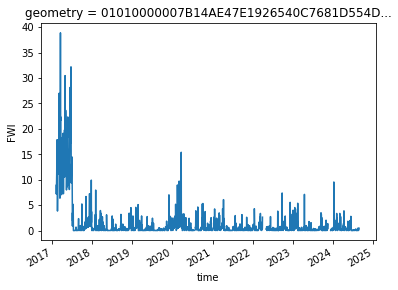

In [16]:
fwi_data.plot() #Plotting the FWI 1 week prior to the port hills fire

1b

In [109]:
WRF_2016_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2016*',recursive=False))
WRF_2017_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2017*',recursive=False))
WRF_2018_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2018*',recursive=False))
WRFufiles_3yrs = WRF_2016_ufiles + WRF_2017_ufiles + WRF_2018_ufiles #Aggregating the U file data

In [110]:
WRF_2016_vfiles=sorted(glob.glob('/mnt/Metservice_WRF/V_2016*',recursive=False))
WRF_2017_vfiles=sorted(glob.glob('/mnt/Metservice_WRF/V_2017*',recursive=False))
WRF_2018_vfiles=sorted(glob.glob('/mnt/Metservice_WRF/V_2018*',recursive=False))
WRFvfiles_3yrs = WRF_2016_vfiles + WRF_2017_vfiles + WRF_2018_vfiles #Aggregating the V file data

In [111]:
WRFufiles_3yrs = xr.open_mfdataset(WRFufiles_3yrs,chunks={"height":1,"time":72},parallel=True)
WRFvfiles_3yrs = xr.open_mfdataset(WRFvfiles_3yrs,chunks={"height":1,"time":72},parallel=True)

In [112]:
WRF_2016_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2016*',recursive=False))
WRF_2017_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2017*',recursive=False))
WRF_2018_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2018*',recursive=False))
WRFrnfiles_3yrs = WRF_2016_rnfiles + WRF_2017_rnfiles + WRF_2018_rnfiles #Aggregating the rainfall file data

In [113]:
WRFrnfiles_3yrs

['/mnt/Metservice_WRF/RAINNC_20160101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160301000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160401000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160501000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160601000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160701000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160801000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20160901000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20161001000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20161101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20161201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170301000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170401000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170501000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170601000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170701000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20170801000000.nc',
 '/mnt/Metservice_WR

In [114]:
WRFrnfiles_3yrs = xr.open_mfdataset(WRFrnfiles_3yrs,chunks={"height":1,"time":72},parallel=True)

In [133]:
WRFrnfiles_3yrs.RAINNC

<xarray.DataArray 'RAINNC' (time: 26304, lat: 508, lon: 472)>
dask.array<concatenate, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0

In [29]:
WRF_2016_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2016*',recursive=False))
WRF_2017_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2017*',recursive=False))
WRF_2018_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2018*',recursive=False))
WRFtfiles_3yrs = WRF_2016_tfiles + WRF_2017_tfiles + WRF_2018_tfiles #Aggregating the temperature file data

In [30]:
WRFtfiles_3yrs

['/mnt/Metservice_WRF/T_20160101000000.nc',
 '/mnt/Metservice_WRF/T_20160201000000.nc',
 '/mnt/Metservice_WRF/T_20160301000000.nc',
 '/mnt/Metservice_WRF/T_20160401000000.nc',
 '/mnt/Metservice_WRF/T_20160501000000.nc',
 '/mnt/Metservice_WRF/T_20160601000000.nc',
 '/mnt/Metservice_WRF/T_20160701000000.nc',
 '/mnt/Metservice_WRF/T_20160801000000.nc',
 '/mnt/Metservice_WRF/T_20160901000000.nc',
 '/mnt/Metservice_WRF/T_20161001000000.nc',
 '/mnt/Metservice_WRF/T_20161101000000.nc',
 '/mnt/Metservice_WRF/T_20161201000000.nc',
 '/mnt/Metservice_WRF/T_20170101000000.nc',
 '/mnt/Metservice_WRF/T_20170201000000.nc',
 '/mnt/Metservice_WRF/T_20170301000000.nc',
 '/mnt/Metservice_WRF/T_20170401000000.nc',
 '/mnt/Metservice_WRF/T_20170501000000.nc',
 '/mnt/Metservice_WRF/T_20170601000000.nc',
 '/mnt/Metservice_WRF/T_20170701000000.nc',
 '/mnt/Metservice_WRF/T_20170801000000.nc',
 '/mnt/Metservice_WRF/T_20170901000000.nc',
 '/mnt/Metservice_WRF/T_20171001000000.nc',
 '/mnt/Metservice_WRF/T_20171101

In [31]:
WRFtfiles_3yrs = xr.open_mfdataset(WRFtfiles_3yrs,chunks={"height":1,"time":72},parallel=True)

In [86]:
WRFtfiles_3yrs

,Array,Chunk
Bytes,234.96 GiB,65.86 MiB
Shape,"(10, 26304, 508, 472)","(1, 72, 508, 472)"
Count,7656 Tasks,3810 Chunks
Type,float32,numpy.ndarray


In [89]:
t_celsius = WRFtfiles_3yrs - 273.15 #Convering the temperature in Celvin to Celsius

In [90]:
t_celsius

,Array,Chunk
Bytes,234.96 GiB,65.86 MiB
Shape,"(10, 26304, 508, 472)","(1, 72, 508, 472)"
Count,11466 Tasks,3810 Chunks
Type,float32,numpy.ndarray


In [46]:
WRF_2016_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2016*',recursive=False))
WRF_2017_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2017*',recursive=False))
WRF_2018_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2018*',recursive=False))
WRFrhfiles_3yrs = WRF_2016_rhfiles + WRF_2017_rhfiles + WRF_2018_rhfiles #Aggregating the relative humditity file data

In [167]:
WRFrhfiles_3yrs

,Array,Chunk
Bytes,23.50 GiB,65.86 MiB
Shape,"(1, 26304, 508, 472)","(1, 72, 508, 472)"
Count,798 Tasks,381 Chunks
Type,float32,numpy.ndarray


In [47]:
WRFrhfiles_3yrs = xr.open_mfdataset(WRFrhfiles_3yrs,chunks={"height":1,"time":72},parallel=True)

In [48]:
u_ht = WRFufiles_3yrs.U.isel(height=0)
v_ht = WRFvfiles_3yrs.V.isel(height=0)

In [200]:
wind_speed = np.sqrt(u_ht**2+v_ht**2) #Calculating Wind Speed

In [168]:
wind_speed

<xarray.DataArray (time: 26304, lat: 508, lon: 472)>
dask.array<sqrt, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

In [170]:
RH=WRFrhfiles_3yrs.sel(lat=-43.61357944,lon=172.57391640,height=10,method="nearest")
T=t_celsius.sel(lat=-43.61357944,lon=172.57391640,height=10,method="nearest")
Wind_speed=wind_speed.sel(lat=-43.61357944,lon=172.57391640,method="nearest")
RAINNC=WRFrnfiles_3yrs.sel(lat=-43.61357944,lon=172.57391640,method="nearest") #Attributing the nearest grid point to Early Valley Road for each variable and selecting the height for both RH and T

In [169]:
RAINNC 

<xarray.Dataset>
Dimensions:  (time: 26304)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
    lat      float64 -43.61
    lon      float64 172.6
Data variables:
    RAINNC   (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>

In [171]:
T

<xarray.Dataset>
Dimensions:  (time: 26304)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
    lat      float64 -43.61
    lon      float64 172.6
    height   float64 2.0
Data variables:
    T        (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>

In [172]:
Wind_speed

<xarray.DataArray (time: 26304)>
dask.array<getitem, shape=(26304,), dtype=float32, chunksize=(72,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
    lat      float64 -43.61
    lon      float64 172.6
    height   float64 10.0

In [173]:
RAINNC

<xarray.Dataset>
Dimensions:  (time: 26304)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
    lat      float64 -43.61
    lon      float64 172.6
Data variables:
    RAINNC   (time) float32 dask.array<chunksize=(72,), meta=np.ndarray>

In [174]:
wind_speed

<xarray.DataArray (time: 26304, lat: 508, lon: 472)>
dask.array<sqrt, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

In [127]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, WRF_fwi_data = fwi_calc.FWI_combined_calc(
    T.T,
    RH.RH,
    Wind_speed,
    RAINNC.RAINNC,
    start_date="2017-02-06",
    end_date = "2018-09-09",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  5min  0.1s


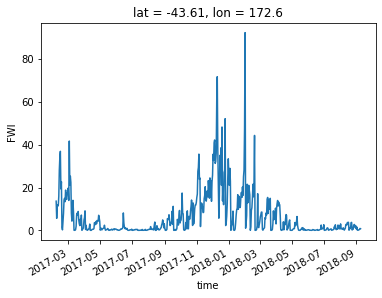

In [130]:
with ProgressBar():
    WRF_fwi_data.plot() #Plotting the FWI 2 months prior to the port hills fire

In [ ]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, WRF_fwi_data_1 = fwi_calc.FWI_combined_calc(
    T.T,
    RH.RH,
    Wind_speed,
    RAINNC.RAINNC,
    start_date="2017-01-13",
    end_date = "2018-09-09",
    ws_unit="m/s"
) # 1 month prior to the Port Hills fire

In [ ]:
with ProgressBar():
    WRF_fwi_data_1.plot() #Plotting the FWI 1 month prior to the port hills fire

In [ ]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, WRF_fwi_data_2 = fwi_calc.FWI_combined_calc(
    T.T,
    RH.RH,
    Wind_speed,
    RAINNC.RAINNC,
    start_date="2016-12-13",
    end_date = "2018-09-09",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

In [ ]:
with ProgressBar():
    WRF_fwi_data_2.plot() #Plotting the FWI 1 week prior to the port hills fire

1c

In [ ]:
# AWI-FWI plot is disproportionately higher during the period of the fire when compared to the rest of the time series, reaching an FWI of 50 during the fire and failing to exceed 20 for the rest of the
# time series. However, despite the the FWI WRF-FWI being high it is more comparable to the rest of the time series reaching ~40 during the fire and multiple times in subsequent years including a couple
# of occassions where it exceeds 60 in 2018.

2a

In [143]:
RH_2 = WRFrhfiles_3yrs.sel(height=10,method="nearest")
T_celcius = t_celsius.sel(height=10,method="nearest") #Selecting the height for RH and T

In [175]:
T_celcius #New Zealand wide dataset for temperature in Celsius

<xarray.Dataset>
Dimensions:  (time: 26304, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0
Data variables:
    T        (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [176]:
RH_2 #New Zealand wide dataset for relative humidity

<xarray.Dataset>
Dimensions:  (time: 26304, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0
Data variables:
    RH       (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [177]:
wind_speed #New Zealand wide dataset for wind speed

<xarray.DataArray (time: 26304, lat: 508, lon: 472)>
dask.array<sqrt, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

In [178]:
WRFrnfiles_3yrs #New Zealand wide dataset for rainfall

<xarray.Dataset>
Dimensions:  (time: 26304, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
Data variables:
    RAINNC   (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [146]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, WRF_fwi_data_3 = fwi_calc.FWI_combined_calc(
    T_celcius.T,
    RH_2.RH,
    wind_speed,
    WRFrnfiles_3yrs.RAINNC,
    start_date="2016-09-01",
    end_date = "2017-04-01",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  1.8s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

In [254]:
WRF_fwi_data_3

<xarray.DataArray 'FWI' (time: 213, lat: 508, lon: 472)>
dask.array<setitem, shape=(213, 508, 472), dtype=float32, chunksize=(1, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * time     (time) datetime64[ns] 2016-09-01 2016-09-02 ... 2017-04-01

In [157]:
with ProgressBar():
    High_FWI_Loc = np.where(WRF_fwi_data_3 >= 31) #Determining where the FWI is greater 31 

[########################################] | 100% Completed |  2min 27.4s


In [160]:
with ProgressBar():
    Time_FWI_Indices = High_FWI_Loc[0] #Selecting time as the coordinates

In [161]:
with ProgressBar():
    Time_Unique_FWI = np.unique(Time_FWI_Indices)

In [162]:
print("Time periods where FWI >= 31", Time_Unique_FWI)

Time periods where FWI >= 31 [  0   6  15  39  40  41  46  69  76  83  86  87  88  89  96  97 100 101
 102 105 106 107 108 109 110 111 112 113 114 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 172 173 174 176 177 181 183 184 185
 186 187 188 195 197 200 204 212]


In [163]:
print("Indices of pixels (time, lat, lon):", Time_FWI_Indices)

Indices of pixels (time, lat, lon): [  0   0   0 ... 204 204 212]


In [245]:
Days_count = (Time_Unique_FWI >= 31).sum(axis=0) #Adding the number of days where the FWI exceeds 31 together

In [246]:
Days_count #The number of days exceeding 31 for each pixel

95

In [250]:
WRF_fwi_data_3

(array([  0,   0,   0, ..., 204, 204, 212]),
 array([  7,   8,   8, ..., 186, 186, 145]),
 array([ 33,  32,  33, ..., 248, 249, 164]))

[########################################] | 100% Completed |  1min 13.8s


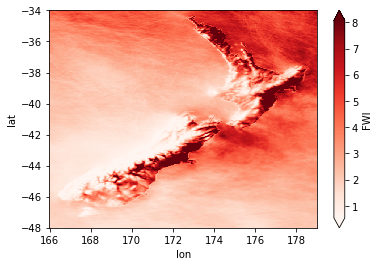

In [257]:
with ProgressBar():
    plt.figure()
    WRF_fwi_data_3.mean(dim='time').plot(robust=True,cmap='Reds') #Map showing the mean number of days where hte FWI exceeded 31 

2b

In [187]:
WRF_2001_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2001*',recursive=False))
WRF_2002_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2002*',recursive=False))
WRF_2010_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2010*',recursive=False))
WRF_2011_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2011*',recursive=False))
WRF_2019_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2019*',recursive=False))
WRF_2020_ufiles = sorted(glob.glob('/mnt/Metservice_WRF/U_2020*',recursive=False))
WRFufiles_6yrs = WRF_2001_ufiles + WRF_2002_ufiles + WRF_2010_ufiles + WRF_2011_ufiles + WRF_2019_ufiles + WRF_2020_ufiles #Aggregating the U file data

In [185]:
WRF_2001_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2001*',recursive=False))
WRF_2002_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2002*',recursive=False))
WRF_2010_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2010*',recursive=False))
WRF_2011_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2011*',recursive=False))
WRF_2019_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2019*',recursive=False))
WRF_2020_vfiles = sorted(glob.glob('/mnt/Metservice_WRF/V_2020*',recursive=False))
WRFvfiles_6yrs = WRF_2001_vfiles + WRF_2002_vfiles + WRF_2010_vfiles + WRF_2011_vfiles + WRF_2019_vfiles + WRF_2020_vfiles #Aggregating the V file data

In [196]:
WRFufiles_6yrs = xr.open_mfdataset(WRFufiles_6yrs,chunks={"height":1,"time":72},parallel=True)
WRFvfiles_6yrs = xr.open_mfdataset(WRFvfiles_6yrs,chunks={"height":1,"time":72},parallel=True)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [197]:
Second_u_ht = WRFufiles_6yrs.U.isel(height=0)
Second_v_ht = WRFvfiles_6yrs.V.isel(height=0)

In [199]:
Second_wind_speed = np.sqrt(Second_u_ht**2+Second_v_ht**2) #Calculating Wind Speed

In [220]:
Second_wind_speed

<xarray.DataArray (time: 52561, lat: 508, lon: 472)>
dask.array<sqrt, shape=(52561, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

In [207]:
WRF_2001_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2001*',recursive=False))
WRF_2002_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2002*',recursive=False))
WRF_2010_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2010*',recursive=False))
WRF_2011_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2011*',recursive=False))
WRF_2019_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2019*',recursive=False))
WRF_2020_rhfiles = sorted(glob.glob('/mnt/Metservice_WRF/RH_2020*',recursive=False))
WRFrhfiles_6yrs = WRF_2001_ufiles + WRF_2002_ufiles + WRF_2010_ufiles + WRF_2011_ufiles + WRF_2019_ufiles + WRF_2020_ufiles #Aggregating the relative humidity file data

In [226]:
WRFrhfiles_6yrs = xr.open_mfdataset(WRFrhfiles_6yrs,chunks={"height":1,"time":72},parallel=True)

In [227]:
WRFrhfiles_6yrs

<xarray.Dataset>
Dimensions:  (time: 52561, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
Data variables:
    RAINNC   (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [212]:
WRF_2001_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2001*',recursive=False))
WRF_2002_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2002*',recursive=False))
WRF_2010_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2010*',recursive=False))
WRF_2011_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2011*',recursive=False))
WRF_2019_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2019*',recursive=False))
WRF_2020_rnfiles = sorted(glob.glob('/mnt/Metservice_WRF/RAINNC_2020*',recursive=False))
WRFrnfiles_6yrs = WRF_2001_rnfiles + WRF_2002_rnfiles + WRF_2010_rnfiles + WRF_2011_rnfiles + WRF_2019_rnfiles + WRF_2020_rnfiles #Aggregating the rainfall file data

In [213]:
WRFrnfiles_6yrs = xr.open_mfdataset(WRFrnfiles_6yrs,chunks={"height":1,"time":72},parallel=True)

In [221]:
WRFrnfiles_6yrs

<xarray.Dataset>
Dimensions:  (time: 52561, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
Data variables:
    RAINNC   (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [214]:
WRF_2001_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2001*',recursive=False))
WRF_2002_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2002*',recursive=False))
WRF_2010_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2010*',recursive=False))
WRF_2011_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2011*',recursive=False))
WRF_2019_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2019*',recursive=False))
WRF_2020_tfiles = sorted(glob.glob('/mnt/Metservice_WRF/T_2020*',recursive=False))
WRFtfiles_6yrs = WRF_2001_tfiles + WRF_2002_tfiles + WRF_2010_tfiles + WRF_2011_tfiles + WRF_2019_tfiles + WRF_2020_tfiles #Aggregating the temperature file data

In [231]:
WRFtfiles_6yrs = xr.open_mfdataset(WRFtfiles_6yrs,chunks={"height":1,"time":72},parallel=True)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [216]:
Second_t_celsius = WRFtfiles_6yrs - 273.15 #Converting the temperature in Celvin to Celsius

In [217]:
Second_t_celsius

,Array,Chunk
Bytes,469.49 GiB,65.86 MiB
Shape,"(10, 52561, 508, 472)","(1, 72, 508, 472)"
Count,22932 Tasks,7620 Chunks
Type,float32,numpy.ndarray


In [233]:
Second_RH_2 = WRFrhfiles_6yrs.sel(height=10,method="nearest")
Second_T_celcius = Second_t_celsius.sel(height=10,method="nearest") #Selecting the height for both RH and T

KeyError: "'height' is not a valid dimension or coordinate"

In [240]:
Second_T_celcius

<xarray.Dataset>
Dimensions:  (time: 52561, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0
Data variables:
    T        (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [234]:
Second_RH_2

<xarray.Dataset>
Dimensions:  (time: 26304, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0
Data variables:
    RH       (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [241]:
Second_wind_speed

<xarray.DataArray (time: 52561, lat: 508, lon: 472)>
dask.array<sqrt, shape=(52561, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

In [242]:
WRFrnfiles_6yrs

<xarray.Dataset>
Dimensions:  (time: 52561, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-01T01:00:00 ... 2020-12-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
Data variables:
    RAINNC   (time, lat, lon) float32 dask.array<chunksize=(72, 508, 472), meta=np.ndarray>

In [244]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, Summer_fwi_data_1 = fwi_calc.FWI_combined_calc(
    Second_T_celcius.T,
    Second_RH_2.RH,
    Second_wind_speed,
    WRFrnfiles_6yrs.RAINNC,
    start_date="2001-09-01",
    end_date = "2002-04-01",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

ValueError: cannot align objects with join='exact' where index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',)

In [182]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, Summer_fwi_data_2 = fwi_calc.FWI_combined_calc(
    T_celcius.T,
    RH_2.RH,
    wind_speed,
    WRFrnfiles_3yrs.RAINNC,
    start_date="2010-09-01",
    end_date = "2011-04-01",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire

IndexError: Index 0 is out of bounds for axis 0 with size 0

In [ ]:
with ProgressBar():
 ffmc_data, dmc_data, dc_data, isi_data, bui_data, Summer_fwi_data_3 = fwi_calc.FWI_combined_calc(
    T_celcius.T,
    RH_2.RH,
    wind_speed,
    WRFrnfiles_3yrs.RAINNC,
    start_date="2019-09-01",
    end_date = "2020-04-01",
    ws_unit="m/s"
) # 1 week prior to the Port Hills fire